In [1]:
from evalutils import *
from lccv import *
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
X, y = get_dataset(1485)

In [5]:
def compute_empirical_model(learner, X, y, anchors = None, repeats = 1000):
    
    # compute anchors if not given
    if anchors is None:
        anchors = [2**x for x in range(6, int(np.log(len(X) * .9) / np.log(2) + 1))]
        anchors.append(int(len(X) * .9))
    
    # fill model
    elm = EmpiricalLearningModel(learner, X, y)
    for anchor in tqdm(anchors):
        print(anchor)
        for seed in tqdm(range(repeats)):
            elm.compute_and_add_sample(anchor, seed)
    return elm

model = compute_empirical_model(sklearn.tree.DecisionTreeClassifier(), X, y, repeats = 1000)

64



128



256



512



1024



2048



2340


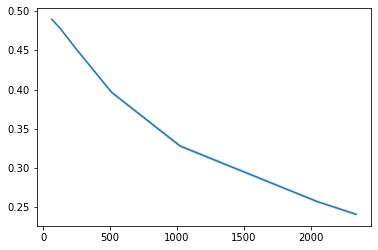

In [6]:
model.plot_model()